In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [81]:
df = pd.read_csv('laguardia_gsod_all_years.csv')
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,YEAR
0,72503014732,1973-01-01,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",54.1,24,44.3,24,...,22.0,57.2,*,50.0,*,0.08,G,999.9,110000,1973
1,72503014732,1973-01-02,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",40.8,24,22.5,24,...,28.0,48.9,*,33.8,*,0.00,G,999.9,0,1973
2,72503014732,1973-01-03,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",32.4,23,17.6,23,...,999.9,35.6,*,30.0,*,1.38,G,999.9,0,1973
3,72503014732,1973-01-04,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",40.6,23,35.0,23,...,30.9,48.2,*,33.8,*,0.51,G,999.9,111000,1973
4,72503014732,1973-01-05,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",40.5,23,28.4,23,...,22.9,45.0,*,37.4,*,1.65,G,999.9,0,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19107,72503014732,2025-04-25,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",68.1,24,42.8,24,...,26.0,75.0,,53.1,,0.00,G,999.9,0,2025
19108,72503014732,2025-04-26,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",64.6,24,57.3,24,...,49.0,75.0,,59.0,,0.10,G,999.9,10010,2025
19109,72503014732,2025-04-27,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",55.6,24,35.2,24,...,38.1,73.9,,50.0,,0.48,G,999.9,10010,2025
19110,72503014732,2025-04-28,40.77945,-73.88027,3.0,"LAGUARDIA AIRPORT, NY US",63.3,24,29.3,24,...,21.0,75.9,*,54.0,*,0.00,G,999.9,0,2025


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19112 entries, 0 to 19111
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           19112 non-null  int64  
 1   DATE              19112 non-null  object 
 2   LATITUDE          19112 non-null  float64
 3   LONGITUDE         19112 non-null  float64
 4   ELEVATION         19112 non-null  float64
 5   NAME              19112 non-null  object 
 6   TEMP              19112 non-null  float64
 7   TEMP_ATTRIBUTES   19112 non-null  int64  
 8   DEWP              19112 non-null  float64
 9   DEWP_ATTRIBUTES   19112 non-null  int64  
 10  SLP               19112 non-null  float64
 11  SLP_ATTRIBUTES    19112 non-null  int64  
 12  STP               19112 non-null  float64
 13  STP_ATTRIBUTES    19112 non-null  int64  
 14  VISIB             19112 non-null  float64
 15  VISIB_ATTRIBUTES  19112 non-null  int64  
 16  WDSP              19112 non-null  float6

In [83]:
df_final = df.drop(columns=['STATION', 'LATITUDE','LONGITUDE','ELEVATION','NAME'])
df_final

,DATE,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,...,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,YEAR
0,1973-01-01,54.1,24,44.3,24,1016.3,24,15.3,24,9.3,...,22.0,57.2,*,50.0,*,0.08,G,999.9,110000,1973
1,1973-01-02,40.8,24,22.5,24,1020.5,24,19.5,24,14.9,...,28.0,48.9,*,33.8,*,0.00,G,999.9,0,1973
2,1973-01-03,32.4,23,17.6,23,1032.2,23,31.2,23,12.9,...,999.9,35.6,*,30.0,*,1.38,G,999.9,0,1973
3,1973-01-04,40.6,23,35.0,23,1017.8,23,16.8,23,5.9,...,30.9,48.2,*,33.8,*,0.51,G,999.9,111000,1973
4,1973-01-05,40.5,23,28.4,23,1012.4,23,11.4,23,13.4,...,22.9,45.0,*,37.4,*,1.65,G,999.9,0,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19107,2025-04-25,68.1,24,42.8,24,1022.5,24,21.4,24,10.0,...,26.0,75.0,,53.1,,0.00,G,999.9,0,2025
19108,2025-04-26,64.6,24,57.3,24,1011.8,18,10.6,24,10.0,...,49.0,75.0,,59.0,,0.10,G,999.9,10010,2025
19109,2025-04-27,55.6,24,35.2,24,1012.4,24,11.4,24,9.9,...,38.1,73.9,,50.0,,0.48,G,999.9,10010,2025
19110,2025-04-28,63.3,24,29.3,24,1023.4,24,22.4,24,10.0,...,21.0,75.9,*,54.0,*,0.00,G,999.9,0,2025


## Column Descriptions
- All data is from LaGuardia Airport in NYC.
- **`DATE`**: Date of the record (MM/DD/YYYY)
- **`TEMP`**: Mean daily temperature (°F, tenths). `9999.9` = missing
- **`TEMP_ATTRIBUTES`**: Number of observations used for TEMP
- **`DEWP`**: Mean daily dew point (°F, tenths). `9999.9` = missing
- **`DEWP_ATTRIBUTES`**: Number of observations used for DEWP
- **`SLP`**: Mean sea level pressure (mb, tenths). `9999.9` = missing
- **`SLP_ATTRIBUTES`**: Number of observations used for SLP
- **`STP`**: Mean station pressure (mb, tenths). `9999.9` = missing
- **`STP_ATTRIBUTES`**: Number of observations used for STP
- **`VISIB`**: Mean visibility (miles, tenths)
- **`VISIB_ATTRIBUTES`**: Number of observations used for VISIB
- **`WDSP`**: Mean wind speed (knots, tenths)
- **`WDSP_ATTRIBUTES`**: Number of observations used for WDSP
- **`MXSPD`**: Max sustained wind speed (knots, tenths)
- **`GUST`**: Max wind gust (knots, tenths)
- **`MAX`**: Max daily temperature (°F, tenths). `9999.9` = missing
- **`MAX_ATTRIBUTES`**: Blank = from max report, `*` = from hourly/synoptic data
- **`MIN`**: Min daily temperature (°F, tenths). `9999.9` = missing
- **`MIN_ATTRIBUTES`**: Blank = from min report, `*` = from hourly/synoptic data
- **`PRCP`**: Precipitation (inches, hundredths). `99.99` = missing
- **`PRCP_ATTRIBUTES`**: Letter codes indicating reporting method (e.g., A = 1 report of 6-hour PRCP)
- **`SNDP`**: Snow depth (inches, tenths). `999.9` = missing
- **`FRSHTT`**: 6-digit weather event indicator:
  - 1st = Fog
  - 2nd = Rain/Drizzle
  - 3rd = Snow/Ice Pellets
  - 4th = Hail
  - 5th = Thunder
  - 6th = Tornado/Funnel Cloud

In [84]:
# addtl time features
df_final['DATE'] = pd.to_datetime(df_final['DATE'], errors='coerce')

df_final['Month'] = df_final['DATE'].dt.month
df_final['Season'] = df_final['DATE'].dt.month % 12 // 3 + 1  # Winter = 1, Spring = 2, Summer = 3, Fall = 4

season_map = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}
df_final['Season_Label'] = df_final['Season'].map(season_map)

df_final.drop(columns=['Season'], inplace=True)
df_final.rename(columns={'Season_Label': 'Season'}, inplace=True)

In [85]:
df_final

,DATE,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,...,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,YEAR,Month,Season
0,1973-01-01,54.1,24,44.3,24,1016.3,24,15.3,24,9.3,...,*,50.0,*,0.08,G,999.9,110000,1973,1,Winter
1,1973-01-02,40.8,24,22.5,24,1020.5,24,19.5,24,14.9,...,*,33.8,*,0.00,G,999.9,0,1973,1,Winter
2,1973-01-03,32.4,23,17.6,23,1032.2,23,31.2,23,12.9,...,*,30.0,*,1.38,G,999.9,0,1973,1,Winter
3,1973-01-04,40.6,23,35.0,23,1017.8,23,16.8,23,5.9,...,*,33.8,*,0.51,G,999.9,111000,1973,1,Winter
4,1973-01-05,40.5,23,28.4,23,1012.4,23,11.4,23,13.4,...,*,37.4,*,1.65,G,999.9,0,1973,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19107,2025-04-25,68.1,24,42.8,24,1022.5,24,21.4,24,10.0,...,,53.1,,0.00,G,999.9,0,2025,4,Spring
19108,2025-04-26,64.6,24,57.3,24,1011.8,18,10.6,24,10.0,...,,59.0,,0.10,G,999.9,10010,2025,4,Spring
19109,2025-04-27,55.6,24,35.2,24,1012.4,24,11.4,24,9.9,...,,50.0,,0.48,G,999.9,10010,2025,4,Spring
19110,2025-04-28,63.3,24,29.3,24,1023.4,24,22.4,24,10.0,...,*,54.0,*,0.00,G,999.9,0,2025,4,Spring


In [86]:
import numpy as np

missing_replacements = {
    'TEMP': 9999.9,
    'DEWP': 9999.9,
    'SLP': 9999.9,
    'STP': 9999.9,
    'VISIB': 999.9,
    'WDSP': 999.9,
    'MXSPD': 999.0,
    'GUST': 999.9,
    'MAX': 9999.9,
    'MIN': 9999.9,
    'PRCP': 99.99,
    'SNDP': 999.9
}

df_final.replace(missing_replacements, np.nan, inplace=True)

In [87]:
# Save DataFrame to CSV
df_final.to_csv('df_final.csv', index=False)

## above dataset is missing humidity - found an NOAA dataset that does have humidity. combining the two year ranges below. (i had to download the data into two separate files due to size limits)

In [88]:
df_1 = pd.read_csv('4016092.csv')
df_2 = pd.read_csv('4016094.csv')

C:\Temp\ipykernel_31612\921433541.py:1: DtypeWarning: Columns (21,27,28,29,30,31,32,33,35,36,42,43,44,50,52,57,74,76,77,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('4016092.csv')
C:\Temp\ipykernel_31612\921433541.py:2: DtypeWarning: Columns (35,43,44,47,50,53,57,74,76,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('4016094.csv')


In [89]:
df_1 = df_1[df_1['DailyAverageRelativeHumidity'].notna()]
df_1

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
32,72503014732,2015-01-01T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1639.0,NaN
65,72503014732,2015-01-02T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1639.0,NaN
114,72503014732,2015-01-03T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1640.0,NaN
165,72503014732,2015-01-04T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1641.0,NaN
198,72503014732,2015-01-05T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1642.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134189,72503014732,2024-09-26T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548.0,1745.0,NaN
134232,72503014732,2024-09-27T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0,1743.0,NaN
134278,72503014732,2024-09-28T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1741.0,NaN
134316,72503014732,2024-09-29T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.0,1740.0,NaN


In [90]:
df_2 = df_2[df_2['DailyAverageRelativeHumidity'].notna()]

In [91]:
combined_df = pd.concat([df_2, df_1], ignore_index=True)
combined_df

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72503014732,2010-01-01T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1639.0,NaN
1,72503014732,2010-01-02T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1639.0,NaN
2,72503014732,2010-01-03T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1640.0,NaN
3,72503014732,2010-01-04T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1641.0,NaN
4,72503014732,2010-01-05T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,1642.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,72503014732,2024-09-26T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548.0,1745.0,NaN
5287,72503014732,2024-09-27T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0,1743.0,NaN
5288,72503014732,2024-09-28T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1741.0,NaN
5289,72503014732,2024-09-29T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.0,1740.0,NaN


In [92]:
combined_df.columns.tolist()

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DYHF',
 'DYTS',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'HDSD',
 'HTDD',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'Hourl

In [93]:
columns_to_keep = ['DATE', 'DailyAverageRelativeHumidity']
combined_df = combined_df[columns_to_keep]

In [94]:
combined_df

,DATE,DailyAverageRelativeHumidity
0,2010-01-01T23:59:00,85.0
1,2010-01-02T23:59:00,66.0
2,2010-01-03T23:59:00,60.0
3,2010-01-04T23:59:00,58.0
4,2010-01-05T23:59:00,58.0
...,...,...
5286,2024-09-26T23:59:00,84.0
5287,2024-09-27T23:59:00,73.0
5288,2024-09-28T23:59:00,84.0
5289,2024-09-29T23:59:00,82.0


In [95]:
humidity_df = combined_df.copy()
humidity_df['DATE'] = pd.to_datetime(humidity_df['DATE'], errors='coerce')
humidity_df['DATE'] = humidity_df['DATE'].dt.date
humidity_df

,DATE,DailyAverageRelativeHumidity
0,2010-01-01,85.0
1,2010-01-02,66.0
2,2010-01-03,60.0
3,2010-01-04,58.0
4,2010-01-05,58.0
...,...,...
5286,2024-09-26,84.0
5287,2024-09-27,73.0
5288,2024-09-28,84.0
5289,2024-09-29,82.0


In [96]:
# Save DataFrame to CSV
humidity_df.to_csv('humidity_df.csv', index=False)

## now i combine humidity data to my initial data (i realize i prob did too much here lol but i was working with what i had at each given moment)

In [97]:
# Ensure both columns are converted to datetime
df_final['DATE'] = pd.to_datetime(df_final['DATE'])
humidity_df['DATE'] = pd.to_datetime(humidity_df['DATE'])

# merge
merged_df = pd.merge(df_final, humidity_df, on='DATE', how='inner')

In [98]:
merged_df = merged_df.rename(columns={"DailyAverageRelativeHumidity": "HUMID"})

In [99]:
merged_df

,DATE,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,...,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,YEAR,Month,Season,HUMID
0,2010-01-01,35.1,24,31.5,24,1013.0,21,12.7,24,6.2,...,30.2,,0.23,G,1.2,11000,2010,1,Winter,85.0
1,2010-01-02,29.2,24,20.5,24,1005.4,24,4.4,24,9.1,...,19.9,,0.01,G,NaN,11000,2010,1,Winter,66.0
2,2010-01-03,19.7,24,8.2,24,1001.1,22,999.9,24,8.9,...,17.1,,0.00,G,NaN,1000,2010,1,Winter,60.0
3,2010-01-04,24.2,24,11.6,24,1004.7,24,3.7,24,10.0,...,18.0,,0.00,G,NaN,0,2010,1,Winter,58.0
4,2010-01-05,25.4,24,12.8,24,1006.7,24,5.6,24,10.0,...,21.0,,0.00,G,NaN,0,2010,1,Winter,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,2024-09-26,68.2,24,62.3,24,1018.6,19,17.7,24,8.8,...,62.1,,0.01,G,NaN,10000,2024,9,Fall,84.0
5287,2024-09-27,70.0,24,62.5,24,1016.0,21,15.0,24,9.7,...,64.0,,0.07,G,NaN,10000,2024,9,Fall,73.0
5288,2024-09-28,66.2,24,59.4,24,1014.1,17,13.2,24,7.1,...,62.1,,0.05,G,NaN,10000,2024,9,Fall,84.0
5289,2024-09-29,62.1,24,57.0,24,1016.0,22,15.0,24,6.8,...,61.0,,0.22,G,NaN,10000,2024,9,Fall,82.0


In [100]:
merged_df.to_csv('merged_df.csv', index=False)

## visualizations & testing accuracy of prediction models

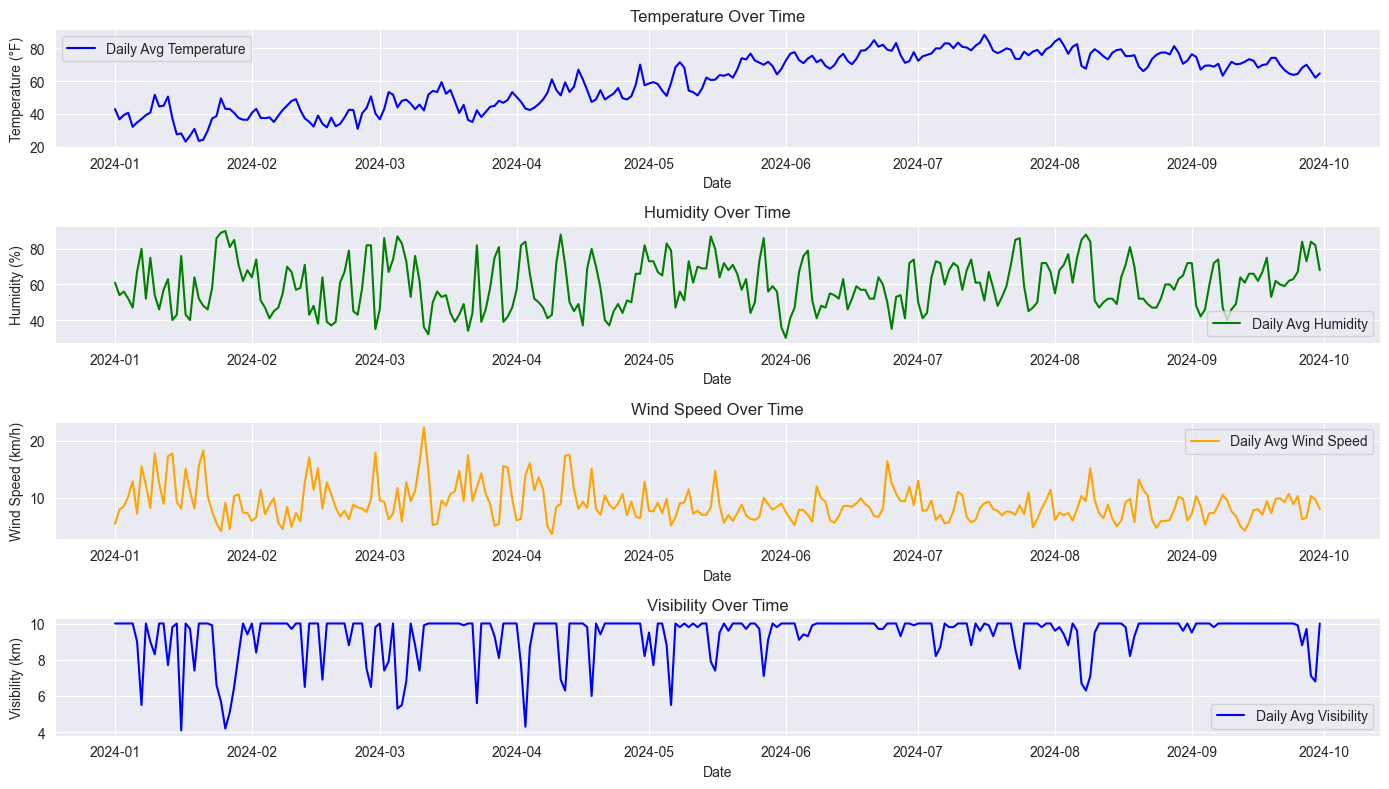

In [101]:
df_2024 = merged_df[(merged_df['DATE'] >= '2024-01-01') & (merged_df['DATE'] <= '2024-12-31')]

plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(df_2024['DATE'], df_2024['TEMP'], label='Daily Avg Temperature', color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df_2024['DATE'], df_2024['HUMID'], label='Daily Avg Humidity', color='green')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df_2024['DATE'], df_2024['WDSP'], label='Daily Avg Wind Speed', color='orange')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df_2024['DATE'], df_2024['VISIB'], label='Daily Avg Visibility', color='blue')
plt.title('Visibility Over Time')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.legend()

plt.tight_layout()
plt.show()


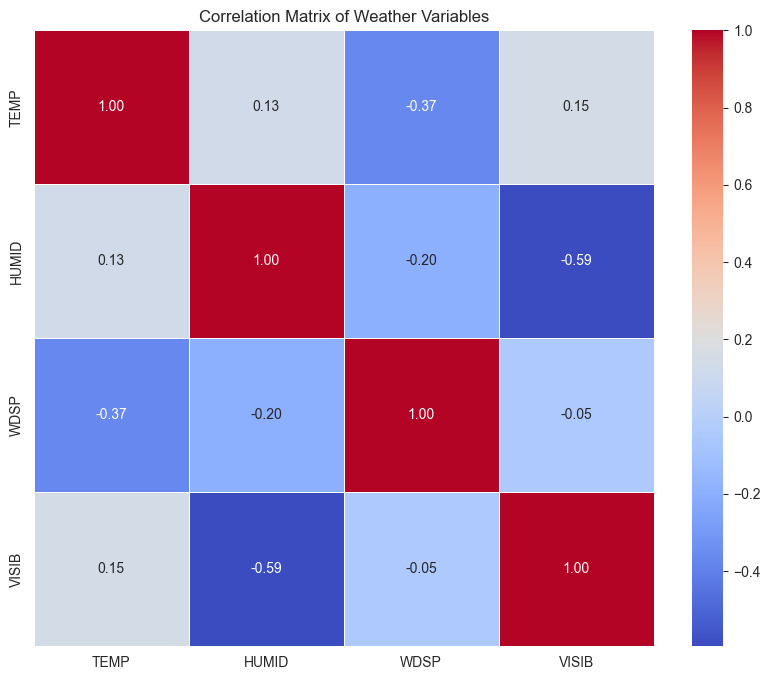

In [102]:
import seaborn as sns

numeric_columns = ['TEMP', 'HUMID', 'WDSP', 'VISIB']
correlation_matrix = merged_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables")
plt.show()

In [103]:
# Individual Pearson correlation
correlation, p_value = pearsonr(merged_df['WDSP'], merged_df['HUMID'])
print(f"Correlation: {correlation:.2f}, P-value: {p_value:.2e}")

Correlation: -0.20, P-value: 1.86e-49


In [104]:
variables = ['WDSP', 'HUMID', 'TEMP', 'VISIB']
results = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1, var2 = variables[i], variables[j]
        r, p = pearsonr(merged_df[var1], merged_df[var2])
        results.append((var1, var2, r, p))

# Add time correlation if DATE exists
if 'DATE' in merged_df.columns and not merged_df['DATE'].isnull().any():
    merged_df['TimeFactor'] = merged_df['DATE'].astype('int64') / 1e9
    for var in variables:
        r, p = pearsonr(merged_df['TimeFactor'], merged_df[var])
        results.append(('Time', var, r, p))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Correlation Coefficient (r)', 'P-value'])
print("All Correlation Results:\n", results_df)

All Correlation Results:
   Variable 1 Variable 2  Correlation Coefficient (r)        P-value
0       WDSP      HUMID                    -0.201211   1.859405e-49
1       WDSP       TEMP                    -0.370501  7.777475e-172
2       WDSP      VISIB                    -0.050727   2.230562e-04
3      HUMID       TEMP                     0.128015   8.929281e-21
4      HUMID      VISIB                    -0.594898   0.000000e+00
5       TEMP      VISIB                     0.145567   1.886564e-26
6       Time       WDSP                    -0.004471   7.450835e-01
7       Time      HUMID                    -0.013573   3.235905e-01
8       Time       TEMP                     0.059872   1.312923e-05
9       Time      VISIB                     0.030956   2.433761e-02


In [105]:
# Show statistically significant only
significant_results = results_df[results_df['P-value'] < 0.05].reset_index()
print("\nSignificant Results:\n", significant_results)


Significant Results:
    index Variable 1 Variable 2  Correlation Coefficient (r)        P-value
0      0       WDSP      HUMID                    -0.201211   1.859405e-49
1      1       WDSP       TEMP                    -0.370501  7.777475e-172
2      2       WDSP      VISIB                    -0.050727   2.230562e-04
3      3      HUMID       TEMP                     0.128015   8.929281e-21
4      4      HUMID      VISIB                    -0.594898   0.000000e+00
5      5       TEMP      VISIB                     0.145567   1.886564e-26
6      8       Time       TEMP                     0.059872   1.312923e-05
7      9       Time      VISIB                     0.030956   2.433761e-02


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Without Visibility
X = merged_df[['TEMP', 'WDSP']]
y = merged_df['HUMID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression (Without Visibility)")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# With Visibility
X = merged_df[['TEMP', 'WDSP', 'VISIB']]
y = merged_df['HUMID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nLinear Regression (With Visibility)")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Linear Regression (Without Visibility)
MSE: 199.54045431344602
R²: 0.05574334979862894

Linear Regression (With Visibility)
MSE: 122.35214042217363
R²: 0.4210105281281584


In [107]:
from sklearn.preprocessing import PolynomialFeatures

X = merged_df[['TEMP', 'WDSP', 'VISIB']]
y = merged_df['HUMID']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Polynomial Regression (degree=2)")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Polynomial Regression (degree=2)
MSE: 111.1597780778363
R²: 0.47397453791487854


In [108]:
from sklearn.ensemble import RandomForestRegressor

X_reg = merged_df[['TEMP', 'WDSP', 'VISIB']]
y_reg = merged_df['HUMID']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

print("Random Forest Regression")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R²:", r2_score(y_test_reg, y_pred_reg))

Random Forest Regression
MSE: 113.72860872471409
R²: 0.4618184293708679


In [109]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_reg, y_train_reg)
y_pred_lasso = lasso.predict(X_test_reg)
print("Lasso Regression")
print("MSE:", mean_squared_error(y_test_reg, y_pred_lasso))
print("R²:", r2_score(y_test_reg, y_pred_lasso))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_reg, y_train_reg)
y_pred_ridge = ridge.predict(X_test_reg)
print("\nRidge Regression")
print("MSE:", mean_squared_error(y_test_reg, y_pred_ridge))
print("R²:", r2_score(y_test_reg, y_pred_ridge))

# ElasticNet Regression
elastic = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic.fit(X_train_reg, y_train_reg)
y_pred_elastic = elastic.predict(X_test_reg)
print("\nElasticNet Regression")
print("MSE:", mean_squared_error(y_test_reg, y_pred_elastic))
print("R²:", r2_score(y_test_reg, y_pred_elastic))

Lasso Regression
MSE: 122.36442158900496
R²: 0.4209524117251834

Ridge Regression
MSE: 122.35172647865593
R²: 0.42101248697365035

ElasticNet Regression
MSE: 122.71839422822451
R²: 0.41927735781332165


Rainy class distribution:
rainy
0    3168
1    2123
Name: count, dtype: int64
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       634
           1       0.80      0.74      0.77       425

    accuracy                           0.82      1059
   macro avg       0.82      0.81      0.81      1059
weighted avg       0.82      0.82      0.82      1059



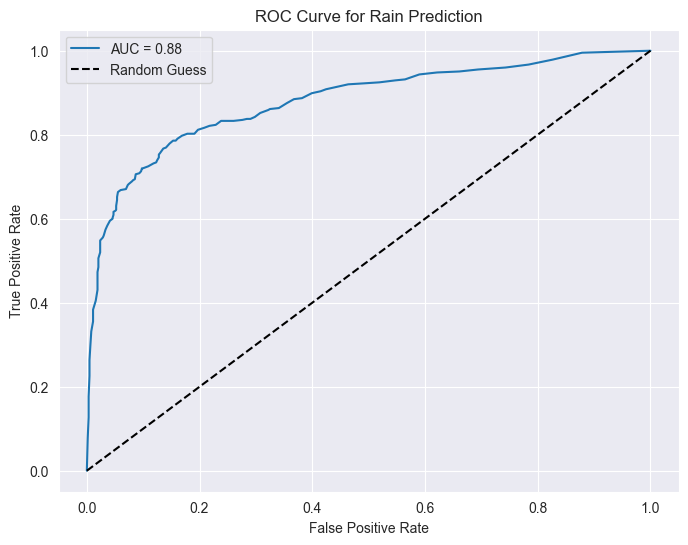

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ensure FRSHTT is a 6-character string (pad with leading 0s if necessary)
merged_df['FRSHTT'] = merged_df['FRSHTT'].astype(str).str.zfill(6)

# Rain is indicated by '1' in the second position (index 1)
merged_df['rainy'] = merged_df['FRSHTT'].str[1].astype(int)

required_cols = ['HUMID', 'VISIB', 'WDSP', 'TEMP', 'rainy']
df_filtered = merged_df.dropna(subset=required_cols)

X = df_filtered[['HUMID', 'VISIB', 'WDSP', 'TEMP']]
y = df_filtered['rainy']

print("Rainy class distribution:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

# Convert X_test back into a DataFrame to retain the index
X_test = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

# Train model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)
rf_classifier.fit(X_train, y_train)

# Predictions and probabilities
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Rain Prediction")
plt.legend()
plt.show()

In [124]:
# Add DATE and rainy label from original merged_df
df_filtered = df_filtered.copy()
df_filtered['DATE'] = merged_df.loc[df_filtered.index, 'DATE']
df_filtered['rainy'] = merged_df.loc[df_filtered.index, 'rainy']

# Create export DataFrame from test set
output_df = df_filtered.loc[X_test.index].copy()
output_df['predicted_rain'] = y_pred
output_df['rain_probability'] = y_pred_proba

# Keep only necessary columns
export_df = output_df[['DATE', 'rainy', 'predicted_rain', 'rain_probability']]

# Export to CSV
export_df.to_csv("rain_predictions_rf.csv", index=False)

KeyError: 'DATE'

In [112]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Clean and scale
features = ['HUMID', 'VISIB', 'WDSP', 'TEMP']
data = merged_df[features].dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence generator
def create_sequences(dataset, time_steps=10):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X_seq, y_seq = create_sequences(scaled_data, time_steps)

# Train/test split
train_size = int(len(X_seq) * 0.8)
X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_test, y_test = X_seq[train_size:], y_seq[train_size:]

In [113]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, len(features))))
model.add(Dense(len(features)))  # Predict all features
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Sara Kiel\PycharmProjects\IS525-Final-Project\.venv_tf\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1399 - val_loss: 0.0202
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0212 - val_loss: 0.0191
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0206 - val_loss: 0.0195
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194 - val_loss: 0.0181
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191 - val_loss: 0.0176
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184 - val_loss: 0.0169
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174 - val_loss: 0.0165
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0170 - val_loss: 0.0160
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167 - val_loss: 0.0166
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175 - val_loss: 0.0161
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
LSTM RMSE (multivariate): 6.62


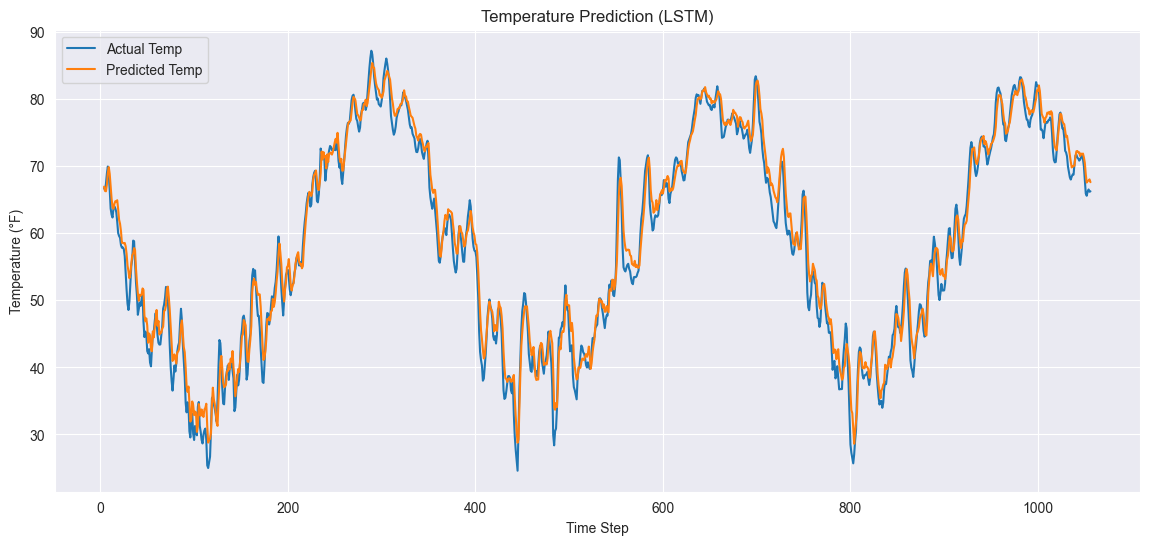

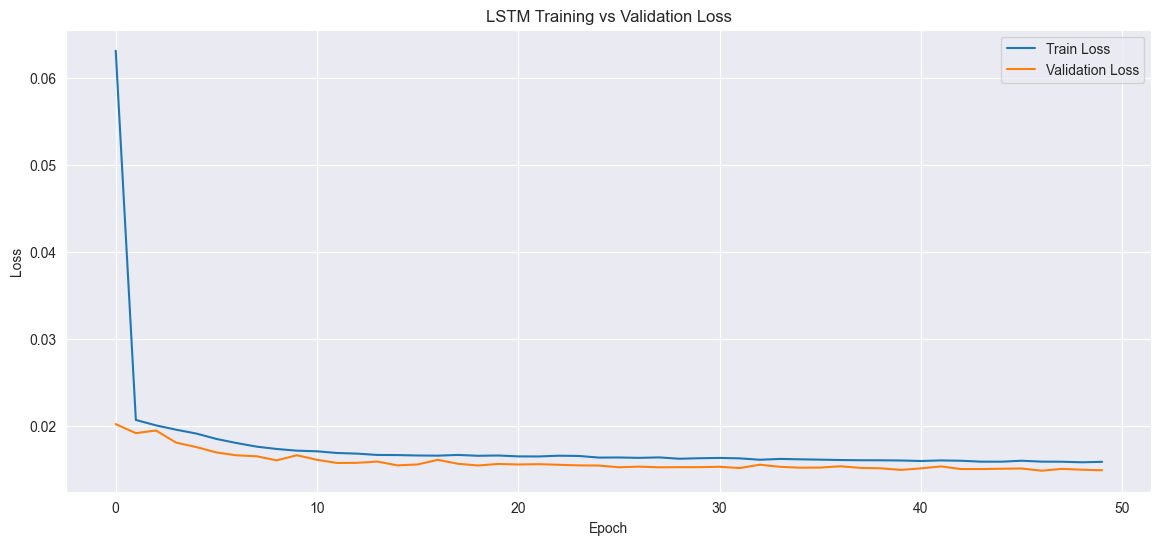

In [114]:
# Predictions
y_pred = model.predict(X_test)

# Inverse transform
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM RMSE (multivariate): {rmse:.2f}")

# applied smoothing for cleaner graph
smooth_actual = pd.Series(y_test_inv[:, 3]).rolling(5).mean()
smooth_pred = pd.Series(y_pred_inv[:, 3]).rolling(5).mean()

# Plot prediction vs actual for temperature
plt.figure(figsize=(14, 6))
plt.plot(smooth_actual, label='Actual Temp')
plt.plot(smooth_pred, label='Predicted Temp')
plt.title('Temperature Prediction (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Plot model loss
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

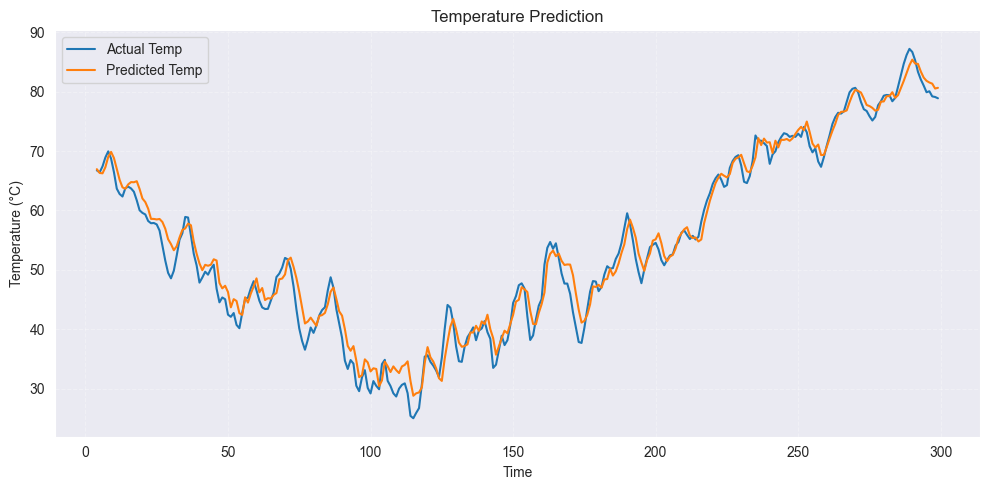

In [115]:
# use only first 300 points and smooth them
smooth_actual = pd.Series(y_test_inv[:300, 3]).rolling(5).mean()
smooth_pred = pd.Series(y_pred_inv[:300, 3]).rolling(5).mean()

plt.figure(figsize=(10, 5))
plt.plot(smooth_actual, label="Actual Temp")
plt.plot(smooth_pred, label="Predicted Temp")
plt.title("Temperature Prediction")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()

In [116]:
features = ['HUMID', 'VISIB', 'WDSP', 'TEMP']

filtered_df = merged_df.dropna(subset=features + ['rainy'])

X_train_class = filtered_df[features].iloc[:train_size]
y_train_class = filtered_df['rainy'].iloc[:train_size]

rf_rain_from_lstm = RandomForestClassifier(n_estimators=100, random_state=4)
rf_rain_from_lstm.fit(X_train_class, y_train_class)

y_rain_pred = rf_rain_from_lstm.predict(y_pred_inv)

y_actual = filtered_df['rainy'].iloc[train_size+10 : train_size+10+len(y_rain_pred)]

accuracy = accuracy_score(y_actual, y_rain_pred)
print(f"Classification Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_actual, y_rain_pred))

Classification Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.35      0.48       628
           1       0.48      0.87      0.62       429

    accuracy                           0.56      1057
   macro avg       0.64      0.61      0.55      1057
weighted avg       0.67      0.56      0.54      1057



C:\Users\Sara Kiel\PycharmProjects\IS525-Final-Project\.venv_tf\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


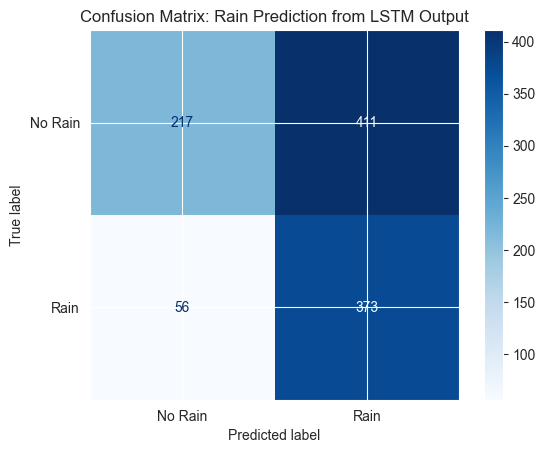

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_actual, y_rain_pred, display_labels=["No Rain", "Rain"],cmap="Blues")
plt.title("Confusion Matrix: Rain Prediction from LSTM Output")
plt.show()

In [118]:
merged_df['rainy'].value_counts(normalize=True)

rainy
0    0.598753
1    0.401247
Name: proportion, dtype: float64

In [119]:
# Ensure all are 1-dimensional
y_pred_ridge = y_pred_ridge.ravel()
y_pred_lasso = y_pred_lasso.ravel()
y_pred_elastic = y_pred_elastic.ravel()
y_pred = y_pred.ravel()
y_test_reg = y_test_reg.ravel()

# Align lengths
min_len = min(len(y_test_reg), len(y_pred_ridge), len(y_pred_lasso), len(y_pred_elastic), len(y_pred))
y_test_reg = y_test_reg[:min_len]
y_pred_ridge = y_pred_ridge[:min_len]
y_pred_lasso = y_pred_lasso[:min_len]
y_pred_elastic = y_pred_elastic[:min_len]
y_pred = y_pred[:min_len]

# Create DataFrames
df_ridge = pd.DataFrame({
    "Model": "Ridge",
    "Real_Humidity": y_test_reg,
    "Predicted_Humidity": y_pred_ridge
})

df_lasso = pd.DataFrame({
    "Model": "Lasso",
    "Real_Humidity": y_test_reg,
    "Predicted_Humidity": y_pred_lasso
})

df_elastic = pd.DataFrame({
    "Model": "ElasticNet",
    "Real_Humidity": y_test_reg,
    "Predicted_Humidity": y_pred_elastic
})

df_rf = pd.DataFrame({
    "Model": "RandomForest",
    "Real_Humidity": y_test_reg,
    "Predicted_Humidity": y_pred_reg
})

# Combine all into one long-format DataFrame
df_all = pd.concat([df_ridge, df_lasso, df_elastic, df_rf], ignore_index=True)

# Export to CSV for Tableau!!!!!
df_all.to_csv("humidity_model_predictions.csv", index=False)

C:\Temp\ipykernel_31612\584952760.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test_reg = y_test_reg.ravel()
